In [22]:
df = pd.read_parquet('walmart.parquet').sample(n=4000)
df.head(1)

,weekly_sales,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
8152,4,31194,49,25,2,128107,26.776667,4.954456,3.133,0.323204,207.155695,4.694185,7.497,0.62734


In [23]:
X = df[df.columns[df.columns != 'weekly_sales']]
y = df['weekly_sales']

In [24]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [25]:
# One of non-linear embedding in sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [26]:
tf = tsne.fit_transform(X)

In [27]:
tsne.kl_divergence_

0.4163799285888672

Text(0.5, 1.0, 't-SNE')

Text(0.5, 0, 'dim1')

Text(0, 0.5, 'dim2')

Text(0.5, 1.0, 't-SNE')

Text(0.5, 0, 'dim1')

Text(0, 0.5, 'dim2')

Text(0.5, 1.0, 't-SNE')

Text(0.5, 0, 'dim1')

Text(0, 0.5, 'dim2')

Text(0.5, 1.0, 't-SNE')

Text(0.5, 0, 'dim1')

Text(0, 0.5, 'dim2')

Text(0.5, 1.0, 't-SNE')

Text(0.5, 0, 'dim1')

Text(0, 0.5, 'dim2')

Text(0.5, 1.0, 't-SNE')

Text(0.5, 0, 'dim1')

Text(0, 0.5, 'dim2')

Text(0.5, 1.0, 't-SNE')

Text(0.5, 0, 'dim1')

Text(0, 0.5, 'dim2')

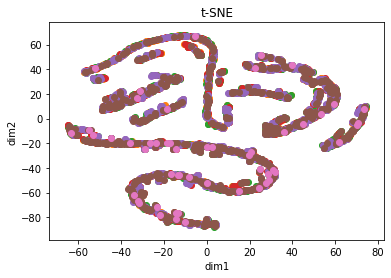

In [28]:
from matplotlib import pyplot as plt

for label in np.unique(y):
    plt.scatter(tf[y == label, 0], tf[y == label, 1])
    plt.title('t-SNE')
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    
plt.show()

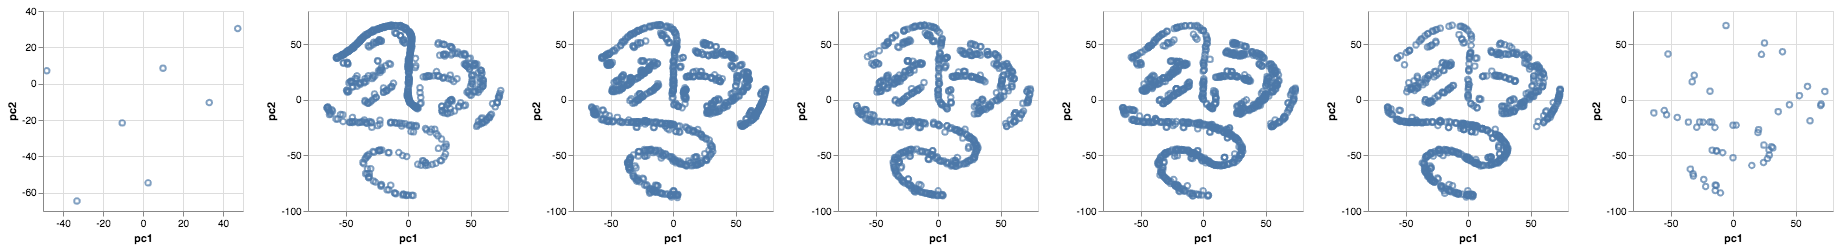

In [29]:
import altair as alt

plots = []

for label in np.unique(y):
    pcs = pd.DataFrame({'pc1': tf[y == label, 0], 'pc2': tf[y == label, 1]})
    plot = alt.Chart(pcs).mark_point().encode(x='pc1', y='pc2').properties(width=200, height=200).interactive() 
    plots.append(plot)

alt.hconcat(*plots)